# Arrays

Scientific programming heavily relies on the `numpy` package for writing high\-performance Python code. Numpy centers the `np.ndarray` data structure, which can naturally represent the vectors and matrices that often come up in chemistry! We can think of arrays as more performant and slightly less flexible lists.  

It's conventional to `import numpy as np` so that you can access `numpy` functions with 3 less letters.



In [ ]:
import numpy as np
primes_array = np.array(primes)
type(primes_array)

The `numpy` array in some ways acts like a fancy list. We can access elements with bracket and slice the arrays just like a list:


In [ ]:
element = primes_array[0]
print('element', element)

subset = primes_array[2:12:3]
print('subset', subset)

But `numpy` is also equipped with a variety of powerful methods we can use for analysis, we'll demonstrate a few here and introduce more later!  



In [ ]:
max = np.max(primes_array)
print('max', max)

min = np.min(primes_array)
print('min', min)

Multi\-dimensional arrays can be created much like the single dimensional arrays we created above.  



In [ ]:
identity = np.array(
    [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]
)
print(identity, 'is the identity matrix.')

These multidimensional arrays have a different "shape" than the single dimensional arrays.  



In [ ]:
print('shape of primes', primes_array.shape)
print('shape of identify', identity.shape)

We can see that the primes are a 1-dimensional array of length 12 and the identity is a 3x3 2-dimensional array.



### Problems


`1` Create a 1D array of length 5 full of zeros using the `zeros()` function found in `numpy`, you might want to read the documentation found here: 

https://numpy.org/doc/stable/reference/generated/numpy.zeros.html 

Once you have your array of zeros, use a for loop to fill the array with \[3, 5, 7, 9, 11\]. Note that each value is defined as $2x+3$ where $x$ is $0,1,2,3,4$. You might find the built in function `range` also helpful.



In [ ]:
# your code here!

`2` Now let's try doing something similar for a 2D function. The way to access the member of a 2D numpy array is `my_array[index1, index2]`. Write code that creates a 4x4 matrix where each cell of the matrix satisfies the equation $z=2x^2 + y^3 -9$, where x and y are integers from 0 to 3. For example, `my_array[1,2]` should be 

$$
2*1^2 + 2^3-9
$$
$$
=1
$$

In [ ]:
# your code here!

In [ ]:
### Solutions

`1` Create a 1D array of length 5 full of zeros using the `zeros()` function found in `numpy`, you might want to read the documentation found here: 

https://numpy.org/doc/stable/reference/generated/numpy.zeros.html 

Once you have your array of zeros, use a for loop to fill the array with \[3, 5, 7, 9, 11\]. Note that each value is defined as $2x+3$ where $x$ is $0,1,2,3,4$. You might find the built in function `range` also helpful.



In [ ]:
import numpy as np

five_zeros = np.zeros(5) # Creates the initial array

for x in range(5): # Loops through all indices
    five_zeros[x] = 2 * x + 3 # Assigns appropriate value

print(five_zeros)


`2` Now let's try doing something similar for a 2D function. The way to access the member of a 2D array is `my_array[index1][index2].`Write code that creates a 4x4 matrix where each cell of the matrix satisfies the equation $z=2x^2 + y^3 -9$, where x and y are integers from 0 to 3. For example, `my_array[1][2]` should be 

$$
2*1^2 + 2^3-9
$$

$$
=1
$$



In [ ]:
matrix = np.zeros((4, 4)) # Creates the initial array

# Loops through both dimensions
for x in range(4):
    for y in range(4):
        matrix[x][y] = 2 * x ** 2 + y ** 3 - 9 # Assigns appropriate value

print(matrix)

### Simple SMILES

SMILES are a popular text representation of molecules. They use a string of elements and bonds to encode the molecular structure, with hydrogens represented implicitly. For example, ethyl alcohol is encoded as "CCO". For this problem, we will use a simplified SMILES representation to encode linear Carbon chains with arbitrary functional groups. Here are the rules:

1. We will only include C, O, N, F, and H.

2. If no bond is given, we will assume a single bond is formed. Double bonds are represented with = and triple bonds are represented with #. 

3. We will only encode linear chains of carbons. Any non-carbon atoms will be bonded to the preceding carbon. For example, carbonic acid is represented as COO=O. Though it might look like the final oxygen is bonded to the second oxygen, by this rule, it is bonded to the carbon.

4. Hydrogens are represented implicitly and all atoms are neutral.

Examples:

- CO: methyl alcohol
- CFFCFF: polytetrafluoroethylene monomer
- CCCCO: butanol
- COO=O: carbonic acid
- CCN: ethyl amine
- CCCC#N: butyro nitride

Write a function that calculates the number of bonds in a molecule from the smile.

**HINT:** we can calculate the number of bonds by considering only the identify of each element. If we ignore the bond from the up-chain carbon, carbons form 3 bonds, nitrogen 2, oxygen 1, and fluorine 0. Similar logic can be applied to double and triple bonds.


In [ ]:
def number_of_bonds(smile):
    # your code here #
    return # number of bonds #

**Testing your code is an extremely good practice**

If you have successfully written your function, the following cell should print `"success"` without any error.

In [ ]:
def test_number_of_bonds():
    # this function should print success
    assert number_of_bonds("CO") == 5
    assert number_of_bonds("CFFCFF") == 7
    assert number_of_bonds("CCCCO") == 14
    assert number_of_bonds("COO=O") == 5
    assert number_of_bonds("CCN") == 9
    assert number_of_bonds("CCCC#N") == 11
    print("success")

test_number_of_bonds()

### Simple SMILES

In [ ]:
# solutions to number of bonds

def number_of_bonds(smile):
    counts = {"C": 0, "O": 0, "N": 0, "F": 0, "=": 0, "#": 0}
    for character in smile:
        counts[character] += 1
    non_terminal_bonds = counts["C"] * 3 + counts["N"] * 2 + counts["O"]
    bond_order_overcount = counts["="] * 2 + counts["#"] * 4
    n_bonds = non_terminal_bonds - bond_order_overcount + 1
    return n_bonds

def number_of_bonds(smile):
    bonds = {"C": 3, "N": 2, "O": 1, "F": 0, "=": -2, "#": -4}
    bond_count = 1
    for character in smile:
        bond_count += bonds[character]
    return bond_count

In [ ]:
def test_number_of_bonds():
    # this function should print success
    assert number_of_bonds("CO") == 5
    assert number_of_bonds("CFFCFF") == 7
    assert number_of_bonds("CCCCO") == 14
    assert number_of_bonds("COO=O") == 5
    assert number_of_bonds("CCN") == 9
    assert number_of_bonds("CCCC#N") == 11
    print("success")

test_number_of_bonds()

### Euler Method
In the Functions and Approximations module, you used the Euler method to compute a derivative. Now do the same using Python!

Consider the differential equation
$$\frac{df}{dt} = f(t) -t$$
with the initial condition $f(t=0)=\frac{1}{2}$. 

Use the Euler method to approximate the function $f(t)$ from $t=0$ to $t=1$ using time steps of $\Delta t =0.2$ and $\Delta t = 0.5$ As a reminder, the Euler method is given by
$$f(t+\Delta t) = f(t) + \Delta t \frac{df}{dt}$$

Plot both approximations as well as the analytical function, $f(t) = -\frac{1}{2}e^t + t + 1$. Comment on the qualities of the approximations. How could we improve our approximation?

### Plot and solve a self-consistent equation

Plot $f(x) = \tanh(ax)$ over the domain $[-1, 1]$ for several values of $a$ (suggestion: $a<1, a=1, a>1$). Also plot $y=x$ for reference. Label your plot!

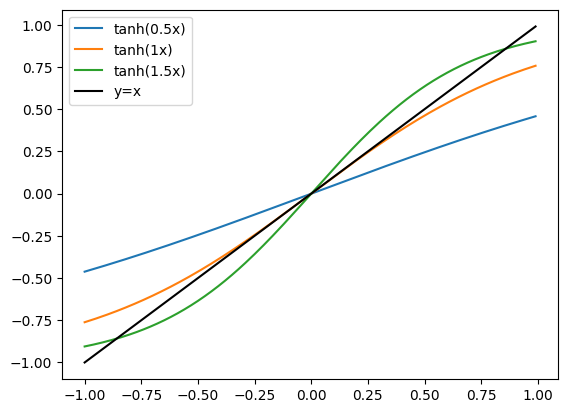

In [ ]:
x = np.arange(-1, 1, 0.01)
for a in [0.5, 1, 1.5]:
    plt.plot(x, np.tanh(a*x), label=f"tanh({a}x)")
plt.plot(x, x, color='k', label="y=x")
plt.legend()

Find the solutions to the self-consistent equation.
Hint: `np.isclose`

In [ ]:
solutions = {}
for a in [0.5, 1, 1.5]:
    solutions[a] = []
    for i, j in zip(np.tanh(a*x), x):
        if np.isclose(i, j, atol=1e-3):
            solutions[a].append(i)
print(solutions)

{0.5: [4.440892098500626e-16], 1: [-0.1390924478784573, -0.1292725836060576, -0.11942729853438512, -0.10955847021442874, -0.09966799462495503, -0.0897577847471593, -0.07982976911113056, -0.06988589031642817, -0.05992810352914267, -0.04995837495787913, -0.039978680311162716, -0.029991003238819286, -0.019997333759930062, -0.00999966667999858, 8.881784197001252e-16, 0.009999666680000357, 0.019997333759931835, 0.02999100323882106, 0.03997868031116449, 0.0499583749578809, 0.05992810352914444, 0.06988589031642993, 0.07982976911113232, 0.08975778474716106, 0.09966799462495679, 0.1095584702144305, 0.11942729853438687, 0.1292725836060593, 0.139092447878459], 1.5: [-0.8591265382143658, 1.3322676295501878e-15, 0.8591265382143665]}
